In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from math import log
import seaborn as sns
import pandas as pd

In [56]:
def load_dataset(name):
    X, y = [], []
    with open('./' + name) as f:
        for line in f:
            instance = [float(x) for x in line.split()[:-1]]
            # print(instance)
            label = int(line.split()[-1])
            X.append(instance)
            y.append(label)
            
    return np.array(X), np.array(y)

In [57]:
# If no majority class in a leaf, predict y = 1
def find_majority_label(y):
    unique_cls, counts = np.unique(y, return_counts=True)
    if len(unique_cls) == 2 and counts[0] == counts[1]:
        return 1
    idx = counts.argmax()
    return unique_cls[idx]

In [66]:
def entropy(y):
    counter = Counter(y)
    res = 0.0
    for num in counter.values():
        p = num / len(y)
        res -= p * np.log2(p)
    return res

def overall_entropy(y_l, y_r):
    total_num = len(y_l) + len(y_r)
    p_l = len(y_l) / total_num
    p_r = len(y_r) / total_num
    return p_l * entropy(y_l) + p_r * entropy(y_r)

def entropy_feature(y_l, y_r):
    total_num = len(y_l) + len(y_r)
    p_l = len(y_l) / total_num
    p_r = len(y_r) / total_num
    if p_l != 0 and p_r != 0:
        ent_feature = -p_l * np.log2(p_l) - p_r * np.log2(p_r)
        return ent_feature
    else:
        return 0

def split(X, y, d, value):
    index_l = (X[:,d] >= value)
    index_r = (X[:,d] < value)
    return X[index_l], X[index_r], y[index_l], y[index_r]

def find_best_split(X, y):
    best_ratio = -float('inf')
    best_d, best_v = -1, -1
    for d in range(X.shape[1]):
        values = X[:, d]
        unique_values = np.unique(X[:, d])
        for i in range(len(unique_values)):
            v = unique_values[i]
            X_l, X_r, y_l, y_r = split(X, y, d, v)
            if entropy_feature(y_l, y_r) != 0:
                GR = (entropy(y) - overall_entropy(y_l, y_r))/entropy_feature(y_l, y_r)
                if GR > best_ratio and GR != 0:
                    best_ratio, best_d, best_v = GR, d, v
    return best_ratio, best_d, best_v
    

In [123]:
def create_tree(X, y):
    if len(np.unique(y)) == 1: 
        return find_majority_label(y)
    
    # recursive part 
    best_ratio, best_d, best_v = find_best_split(X, y)
#     print("best_ratio, ", best_ratio)
#     print("best dimension, ", best_d)
#     print("best sep value", best_v)

    X_l, X_r, y_l, y_r =  split(X, y, best_d, best_v)
    # print("testing..." ,best_ratio,best_d, best_v)
    
    # instantiate subtree
    question = "x_{} >= {}".format(best_d, best_v)
    subtree = {question:[]}
    
    # recursive answer
    # print("x left ",X_l, "x right ", X_r)
    # print("y left", y_l, "y right ", y_r)
    yes_ans = create_tree(X_l, y_l)
#     print(f"yes ans {yes_ans}")
    no_ans = create_tree(X_r, y_r)
#     print(f"no ans {no_ans}")
    if yes_ans == no_ans:
        return yes_ans
    else: 
        subtree[question].append(yes_ans)
        subtree[question].append(no_ans)

    return subtree

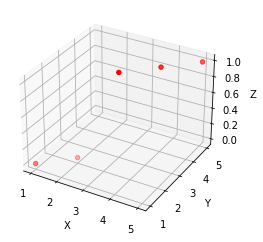

In [72]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the points
x = [1, 2, 3, 4, 5]
y = [1, 2, 3, 4, 5]
z = [0, 0, 1, 1, 1]

# Plot the points
ax.scatter(x, y, z, c='r', marker='o')

# Set the axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.savefig("2.2.pdf", format="pdf")
# Show the plot
plt.show()


In [71]:
grs = []
X, y = load_dataset(name = "Druns.txt")
for i in range(X.shape[1]):
    for j in range(X.shape[0]):
        print("split on x[{}][{}] = {}".format(j, i, X[j][i]))  
        X_l, X_r, y_l, y_r =  split(X, y, i, X[j][i])
        if entropy_feature(y_l, y_r) == 0:
            print("the mutual information is ", entropy(y) - overall_entropy(y_l, y_r))
        else:
            GR = round((entropy(y) - overall_entropy(y_l, y_r))/entropy_feature(y_l, y_r), 2)
            print("the information gain ratio is ", GR)
            grs.append(GR)
print(grs)

split on x[0][0] = 0.1
the information gain ratio is  0.1
split on x[1][0] = 0.0
the mutual information is  0.0
split on x[2][0] = 0.0
the mutual information is  0.0
split on x[3][0] = 0.0
the mutual information is  0.0
split on x[4][0] = 0.0
the mutual information is  0.0
split on x[5][0] = 0.0
the mutual information is  0.0
split on x[6][0] = 0.0
the mutual information is  0.0
split on x[7][0] = 0.0
the mutual information is  0.0
split on x[8][0] = 0.0
the mutual information is  0.0
split on x[9][0] = 0.0
the mutual information is  0.0
split on x[10][0] = 0.0
the mutual information is  0.0
split on x[0][1] = -2.0
the mutual information is  0.0
split on x[1][1] = -1.0
the information gain ratio is  0.1
split on x[2][1] = 0.0
the information gain ratio is  0.06
split on x[3][1] = 1.0
the information gain ratio is  0.01
split on x[4][1] = 2.0
the information gain ratio is  0.0
split on x[5][1] = 3.0
the information gain ratio is  0.02
split on x[6][1] = 4.0
the information gain ratio is

In [125]:
X, y = load_dataset(name = "D3leaves.txt")
tree = create_tree(X, y)
tree

{'x_0 >= 10.0': [1, {'x_1 >= 3.0': [1, 0]}]}

In [126]:
X_D1, y_D1 = load_dataset(name = "D1.txt")
print(X_D1)
tree_D1 = create_tree(X_D1, y_D1)
tree_D1

[[0.264185 0.178456]
 [0.409499 0.213456]
 [0.926224 0.540329]
 ...
 [0.285166 0.956678]
 [0.751571 0.514041]
 [0.142654 0.226182]]


{'x_1 >= 0.201829': [1, 0]}

In [82]:
X_D2, y_D2 = load_dataset(name = "D2.txt")
tree_D2 = create_tree(X_D2, y_D2)
tree_D2

best_ratio,  0.2238061143668733
best dimension,  0
best sep value 0.533076
best_ratio,  0.40277675382774364
best dimension,  1
best sep value 0.228007
best_ratio,  0.1751133281825154
best dimension,  1
best sep value 0.424906
yes ans 1
best_ratio,  0.5206601917193016
best dimension,  0
best sep value 0.708127
yes ans 1
best_ratio,  0.34644489742573253
best dimension,  1
best sep value 0.32625
best_ratio,  0.5023576805798505
best dimension,  0
best sep value 0.595471
best_ratio,  0.3191750665186214
best dimension,  0
best sep value 0.646007
yes ans 1
best_ratio,  1.0
best dimension,  1
best sep value 0.403494
yes ans 1
no ans 0
no ans {'x_1 >= 0.403494': [1, 0]}
yes ans {'x_0 >= 0.646007': [1, {'x_1 >= 0.403494': [1, 0]}]}
no ans 0
yes ans {'x_0 >= 0.595471': [{'x_0 >= 0.646007': [1, {'x_1 >= 0.403494': [1, 0]}]}, 0]}
no ans 0
no ans {'x_1 >= 0.32625': [{'x_0 >= 0.595471': [{'x_0 >= 0.646007': [1, {'x_1 >= 0.403494': [1, 0]}]}, 0]}, 0]}
no ans {'x_0 >= 0.708127': [1, {'x_1 >= 0.32625': 

{'x_0 >= 0.533076': [{'x_1 >= 0.228007': [{'x_1 >= 0.424906': [1,
      {'x_0 >= 0.708127': [1,
        {'x_1 >= 0.32625': [{'x_0 >= 0.595471': [{'x_0 >= 0.646007': [1,
              {'x_1 >= 0.403494': [1, 0]}]},
            0]},
          0]}]}]},
    {'x_0 >= 0.887224': [{'x_1 >= 0.037708': [{'x_1 >= 0.082895': [1,
          {'x_0 >= 0.960783': [1, 0]}]},
        0]},
      {'x_0 >= 0.850316': [{'x_1 >= 0.169053': [1, 0]}, 0]}]}]},
  {'x_1 >= 0.88635': [{'x_0 >= 0.041245': [{'x_0 >= 0.104043': [1,
        {'x_0 >= 0.07642': [0, 1]}]},
      0]},
    {'x_1 >= 0.691474': [{'x_0 >= 0.254049': [1,
        {'x_0 >= 0.191915': [{'x_1 >= 0.792752': [1, 0]},
          {'x_1 >= 0.864128': [{'x_0 >= 0.144781': [1, 0]}, 0]}]}]},
      {'x_1 >= 0.534979': [{'x_0 >= 0.426073': [1,
          {'x_0 >= 0.409972': [{'x_0 >= 0.417579': [0, 1]},
            {'x_0 >= 0.393227': [{'x_0 >= 0.39583': [0, 1]}, 0]}]}]},
        0]}]}]}]}

In [86]:
X_D1 = pd.DataFrame(data = X_D1, columns = ['x1', 'x2'])
# print(X_D1)
X_D1['x1']

0      0.264185
1      0.409499
2      0.926224
3      0.573685
4      0.953159
         ...   
995    0.211320
996    0.625005
997    0.285166
998    0.751571
999    0.142654
Name: x1, Length: 1000, dtype: float64

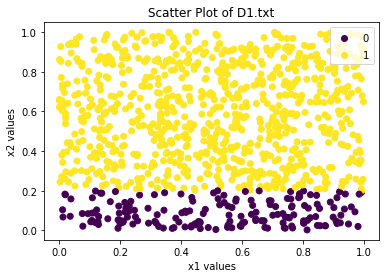

In [98]:
# create scatter plot
fig, ax = plt.subplots()
scatter = ax.scatter(X_D1['x1'], X_D1['x2'], c=y_D1)

# set plot title and labels
plt.title("Scatter Plot of D1.txt")
plt.xlabel("x1 values")
plt.ylabel("x2 values")
ax.legend(*scatter.legend_elements(), loc = "upper right")

plt.savefig("6.1.pdf", format="pdf")
# show plot
plt.show()

In [99]:
X_D2 = pd.DataFrame(data = X_D2, columns = ['x1', 'x2'])
X_D2['x1']

0      0.315561
1      0.344972
2      0.398419
3      0.347109
4      0.985903
         ...   
995    0.418671
996    0.794456
997    0.384576
998    0.843186
999    0.691812
Name: x1, Length: 1000, dtype: float64

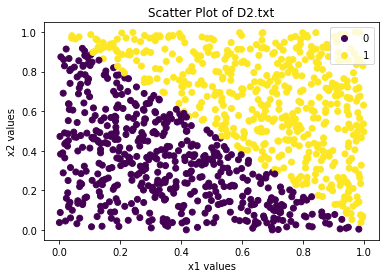

In [100]:
# create scatter plot
fig, ax = plt.subplots()
scatter = ax.scatter(X_D2['x1'], X_D2['x2'], c=y_D2)

# set plot title and labels
plt.title("Scatter Plot of D2.txt")
plt.xlabel("x1 values")
plt.ylabel("x2 values")
ax.legend(*scatter.legend_elements(), loc = "upper right")

plt.savefig("6.2.pdf", format="pdf")
# show plot
plt.show()

In [102]:
def predict(example, tree):
    question = list(tree.keys())[0]
    feature_name, operator, value = question.split()
    feature_d = int(feature_name.split("_")[1])
    if(example[feature_d] >= float(value)):
        ans = tree[question][0]
    else:
        ans = tree[question][1]
    
    if not isinstance(ans, dict):
        return ans
    else:
        res_tree = ans
        return predict(example, res_tree)

In [132]:
def plot_decision_boundary(predic_func, tree, axis):   
    x1, x2 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    
    X_new = np.c_[x1.ravel(), x2.ravel()]

    y_predict = np.array([predic_func(instance, tree) for instance in X_new])
    zz = y_predict.reshape(x1.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9']) #cmap: color_map
    
    plt.contourf(x1, x2, zz, cmap=custom_cmap)
    
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

best_ratio,  1.0
best dimension,  1
best sep value 0.201829
yes ans 1
no ans 0


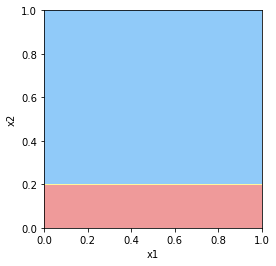

In [110]:
X, y = load_dataset(name = "D1.txt")
tree = create_tree(X, y)
plot_decision_boundary(predict, tree, axis = [0, 1, 0, 1] )

best_ratio,  0.2238061143668733
best dimension,  0
best sep value 0.533076
best_ratio,  0.40277675382774364
best dimension,  1
best sep value 0.228007
best_ratio,  0.1751133281825154
best dimension,  1
best sep value 0.424906
yes ans 1
best_ratio,  0.5206601917193016
best dimension,  0
best sep value 0.708127
yes ans 1
best_ratio,  0.34644489742573253
best dimension,  1
best sep value 0.32625
best_ratio,  0.5023576805798505
best dimension,  0
best sep value 0.595471
best_ratio,  0.3191750665186214
best dimension,  0
best sep value 0.646007
yes ans 1
best_ratio,  1.0
best dimension,  1
best sep value 0.403494
yes ans 1
no ans 0
no ans {'x_1 >= 0.403494': [1, 0]}
yes ans {'x_0 >= 0.646007': [1, {'x_1 >= 0.403494': [1, 0]}]}
no ans 0
yes ans {'x_0 >= 0.595471': [{'x_0 >= 0.646007': [1, {'x_1 >= 0.403494': [1, 0]}]}, 0]}
no ans 0
no ans {'x_1 >= 0.32625': [{'x_0 >= 0.595471': [{'x_0 >= 0.646007': [1, {'x_1 >= 0.403494': [1, 0]}]}, 0]}, 0]}
no ans {'x_0 >= 0.708127': [1, {'x_1 >= 0.32625': 

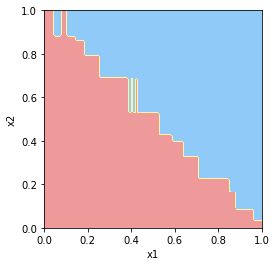

In [112]:
X, y = load_dataset(name = "D2.txt")
tree = create_tree(X, y)
plot_decision_boundary(predict, tree, axis = [0, 1, 0, 1] )

In [129]:
def train_test_split(X, y, train_size = 8192, seed = 666):
    
    assert X.shape[0] == y.shape[0], \
    "the size of X != size of y"
    
    if seed:
        np.random.seed(seed)
        
    shuffle_indexes = np.random.permutation(len(X))  # 0 ~ LEN(X) -1


    train_indexes = shuffle_indexes[:train_size]
    test_indexes = shuffle_indexes[train_size:]

    X_train = X[train_indexes]
    y_train = y[train_indexes]

    X_test = X[test_indexes]
    y_test = y[test_indexes]
    
    return X_train, y_train, X_test, y_test

In [130]:
def count_decision_nodes(tree):
    question = list(tree.keys())[0]
    left, right = 0, 0
    if isinstance(tree[question][0], dict):
        left =  count_nodes(tree[question][0]) 
    if isinstance(tree[question][1], dict):
        right = count_nodes(tree[question][1]) 
    return 1 + right + left

def count_nodes(tree):
    question = list(tree.keys())[0]
    if not isinstance(tree[question][0], dict):
        left = 1
    else:
        left =  count_nodes(tree[question][0]) 
    if not isinstance(tree[question][1], dict):
        right = 1
    else:
        right = count_nodes(tree[question][1]) 
    return 1 + right + left

def plot_err_rate(X, y):
    seq_len = [32, 128, 512, 2048, 8192]
    errs = []
    nodes = []
    d_nodes = []
    X_train, y_train, X_test, y_test = train_test_split(X, y, 8192)
    for length in seq_len:
        X_sub, y_sub =X_train[:length], y_train[:length]
        tree = create_tree(X_sub, y_sub)
        y_predict = np.array([predict(instance, tree) for instance in X_test])
        err = np.sum(y_predict != y_test) / len(y_predict)
        errs.append(err)
        d_nodes.append(count_decision_nodes(tree))
        nodes.append(count_nodes(tree))
    for i in range(len(seq_len)):
        print("n = {}, #of decision nodes = {}, #of nodes = {}, err = {}".format(seq_len[i], d_nodes[i],nodes[i],errs[i]))
    plt.scatter(seq_len, errs)
    plt.plot(seq_len, errs)
    plt.xlabel("n")
    plt.ylabel("err")

In [127]:
X, y = load_dataset(name = "Dbig.txt")
X_train, y_train, X_test, y_test = train_test_split(X, y, 32)
tree = create_tree(X_train, y_train)

n = 32, #of decision nodes = 14, #of nodes = 15, err = 0.24280973451327434
n = 128, #of decision nodes = 34, #of nodes = 35, err = 0.08130530973451328
n = 512, #of decision nodes = 50, #of nodes = 51, err = 0.04811946902654867
n = 2048, #of decision nodes = 129, #of nodes = 129, err = 0.03373893805309734
n = 8192, #of decision nodes = 277, #of nodes = 277, err = 0.017146017699115043


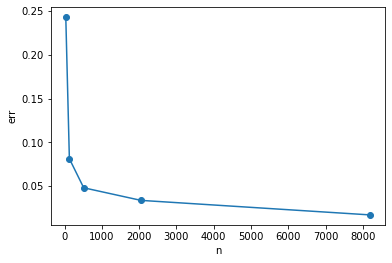

In [131]:
plot_err_rate(X, y)

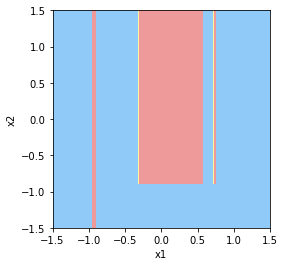

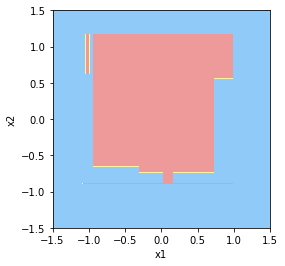

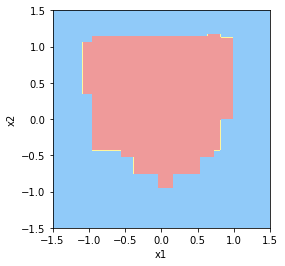

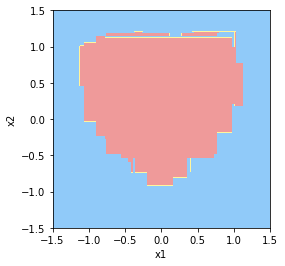

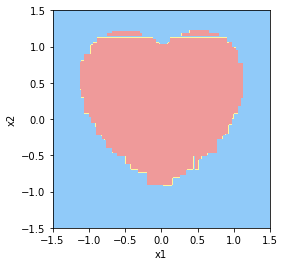

In [134]:
X_train, y_train, X_test, y_test = train_test_split(X, y, 8192)
seq_len = [32, 128, 512, 2048, 8192]
for length in seq_len:
    X_sub, y_sub =X_train[:length], y_train[:length]
    tree = create_tree(X_sub, y_sub)
    y_predict = np.array([predict(instance, tree) for instance in X_test])
    plot_decision_boundary(predict, tree, axis = [-1.5, 1.5, -1.5, 1.5] )

n = 32, #of nodes = 15, err = 0.2334070796460177
n = 128, #of nodes = 31, err = 0.06084070796460177
n = 512, #of nodes = 41, err = 0.03982300884955752
n = 2048, #of nodes = 85, err = 0.025442477876106196
n = 8192, #of nodes = 211, err = 0.014380530973451327


Text(0, 0.5, 'err')

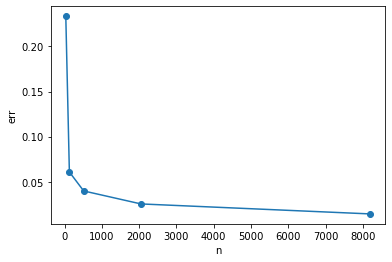

In [138]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier( criterion = "entropy")

seq_len = [32, 128, 512, 2048, 8192]
errs = []
nodes = []
X_train, y_train, X_test, y_test = train_test_split(X, y, 8192)
for length in seq_len:
    X_sub, y_sub =X_train[:length], y_train[:length]
    # tree = create_tree(X_sub, y_sub)
    dt_clf.fit(X_sub, y_sub)
    y_predict = dt_clf.predict(X_test)
    # y_predict = np.array([predict(instance, tree) for instance in X_test])
    err = np.sum(y_predict != y_test) / len(y_predict)
    errs.append(err)
    # d_nodes.append(count_decision_nodes(dt_clf))
    nodes.append(dt_clf.tree_.node_count)
for i in range(len(seq_len)):
    print("n = {}, #of nodes = {}, err = {}".format(seq_len[i],nodes[i],errs[i]))
plt.scatter(seq_len, errs)
plt.plot(seq_len, errs)
plt.xlabel("n")
plt.ylabel("err")

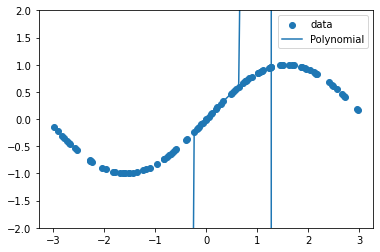

In [172]:
import scipy
from numpy.polynomial.polynomial import Polynomial

a,b = -3,3
n = 100
x = np.random.uniform(a,b,n)
x = np.sort(x)
y = np.sin(x)
f = scipy.interpolate.lagrange(x, y)
plt.scatter(x, y, label = 'data')
# x_new = np.arange(-3, 3, 0.1)
plt.plot(x, Polynomial(f.coef[::-1])(x), label='Polynomial')
plt.ylim([-2,2])
plt.legend()
plt.show()
# plt.scatter(x, f)

In [173]:
Polynomial(f.coef[::-1])(x)

array([-1.00320913e+47, -1.67045513e+46, -2.37915285e+45, -5.87359727e+44,
       -1.27879226e+44, -5.39411225e+43, -3.24533725e+43, -2.31002245e+42,
       -8.84248965e+41, -6.17091964e+38, -3.73398017e+38, -2.32195294e+38,
       -1.33322726e+38, -2.18571881e+35, -2.03661319e+34, -7.59791410e+31,
       -2.58958201e+31, -1.03366455e+30, -1.08234627e+29, -3.63004276e+28,
       -2.78164329e+28, -2.22418176e+27, -1.90260868e+27, -1.29311546e+26,
       -5.98363978e+24, -6.79159295e+22, -7.36842799e+21, -3.02636102e+20,
       -4.38770950e+17, -3.41721282e+14, -3.19167375e+14, -1.33754079e+13,
       -1.44683906e+12, -3.53034993e+11, -1.24273864e+10, -1.04333636e+09,
       -2.98119327e+08, -3.94856537e+01, -1.96241130e+01, -2.34792156e-01,
       -1.81277829e-01, -1.58745338e-01, -1.38163936e-01, -9.64901608e-02,
       -6.37126875e-02, -1.22399568e-02, -5.93478575e-03,  4.74333926e-02,
        1.02114220e-01,  1.08058356e-01,  1.92617444e-01,  2.16429235e-01,
        2.85147192e-01,  

train error 8.206617596768173e+126 and test error 5.5387941259855905e-17


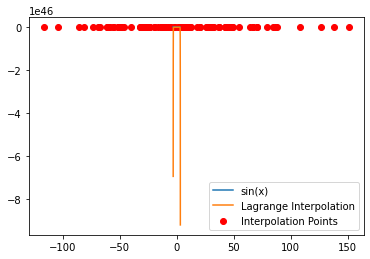

In [210]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange


a,b = -np.pi, np.pi
n = 100
x = np.random.uniform(a,b,n)


noises = np.random.normal(loc=0,scale =50, size = n)
x += noises 

# define y values for interpolation
y = np.sin(x)

poly = lagrange(x, y)


x_test = np.random.uniform(a,b,n)
# define y values for interpolation
y_test = np.sin(x_test)

print("train error {} and test error {}".format(((y - poly(x))**2).mean(), ((y_test - poly(x_test))**2).mean()))





# plot the original function and the interpolated function
plt.plot(x_interp, f(x_interp), label='sin(x)')
plt.plot(x_interp, y_interp, label='Lagrange Interpolation')
plt.scatter(x, y, color='red', label='Interpolation Points')
plt.legend()
plt.show()
